# Kunskapskontroll för kursen Machine Learning
## Ronja Larsson
### 2023-04-04


# Del 1: Besvara teoretiska frågeställningar

## 1. Vad är skillnaden mellan Regressionsproblem och Klassificieringsproblem?

**Svar:** Både Regressionsproblem och Klassifieringsproblem är två huvudtyper av problem som man kan lösa genom maskininlärning. Skillnaden mellan Regressionsproblem och Klassificeringsproblem ligger i prediktionens datatyp. 
    
I ett regressionsproblem är den predikterad variabeln numeriskt kontinuerlig som tar värden på ett kontinuerligt intervall, till exempel när man vill göra prediktioner på löner, huspriser, vikter osv. Man kan ha till exempel en float som visar en lön på 25300,5 SEK, ett huspris på 3,5 miljoner SEK samt ett vikt på 52,5 kg.
    
Å andra sidan är den predikterad variabeln i ett klassificeringsproblem diskret och tillhör en eller flera förutbestämda kategorier, till exempel att när man vill klassificera om en e-post är skräppost eller inte skräppost, om en person befinner sig i Sverige eller USA, mm. En e-post är antingen skräppost eller inte och en person kan bara befinna sig i antingen Sverige eller USA.

## 2. Vad är ”supervised learning”? Kan du ge några exempel på modeller som används och potentiella tillämpningsområden? Vad är RMSE? Vad är en ”Confusion Matrix”?

**Svar:** Maskininlärningssystem kan klassificeras enligt mängden och typen av övervakning de får under träningen. Det finns fyra kategorier: supervised learning, unsupervised learning, semi-supervised learning och reinforcement learning. Supervised learning är då en av dessa fyra maskininlärningssystem. I supervised learning, i träningsdatan så ingår det de korrekta svaren som kallas för labels (brukar sparas i en y-variable). Man ger alltså algorithemen svaren man är ute efter för varje observationsrad.
    
Det finns olika modeller man kan använda inom supervised learning, vilken modell man ska välja beror på tillämpningsområdet, problemet samt datan som ska användas för att träna en modell. Nedan är en lista på några exemple på modeller inom supervised learning med potentiella tillämpningsområde: 
- Linear Regression: Används för att göra prediktion på en kontinuerlig numerisk output, som en persons lön baserat på deras ålder och utbildning.
- Logistic Regression: Används för att göra prediktion på en binär output, som om en kund kommer att köpa en produkt eller ej.  
- Support Vector Machines (SVM): Används för att hitta en optimal hyperplan som separerar olika klasser av data. Tillämpas inom områden som ansiktsigenkänning och textklassificering.
- Decision Trees: Används för att ta beslut genom att dela in data i mindre delar för att hitta mönster. Tillämpas inom till exempel medicinsk diagnos och kreditbedömning.
- Random Forests: En ensemble-modell som använder många beslutsträd för att förbättra prediktionskraften. Används inom områden som bildigenkänning och kundsegmentering.
    
RMSE står för "root mean squared error" och används för att utvärdera hur bra en modell presterar i ett regressionsproblem i maskininlärning. Det mäter genomsnittlig avvikelse mellan den faktiska responsvariabeln och modellens predikterade värden, där avvikelserna är kvadrerade för att undvika att positiva och negativa avvikelser tar ut varandra. Därefter beräknas roten ur medelvärdet av dessa kvadrerade avvikelser för att återgå till samma skala som den ursprungliga responsvariabeln. Ju lägre RMSE desto bättre presterar modellen.

En confusion matrix är en tabell som används för att utvärdera hur bra en klassificeringsmodell presterar i maskininlärning. Den visar antalet korrekta och inkorrekta prediktioner som modellen gjort i förhållande till de faktiska värdena. Matrisen består av fyra olika värden: true positives (TP), false positives (FP), true negatives (TN) och false negatives (FN). Beroende på tillämpningen kan en av dessa fyra värden vara mer betydelsefull än de andra, och användas för att beräkna olika prestandamått såsom precision (mäter andelen av de predikterade positiva instanserna som verkligen var positiva), recall (andelen av alla relevanta instanser som modellen identifierade korrekt) och F1-score (det harmoniska medelvärdet av precision och recall, vilket ger en balanserad bedömning av modellens prestanda på både positiva och negativa exempel i en datamängd).

# Del 2: Använd maskininlärning för att modellera MNIST-dataset

## 1. Importera nödvändiga bibliotek och dataset

In [1]:
# Library needed in this assignment.
import numpy as np
import pandas as pd

# For visualization.
import matplotlib as mpl
import matplotlib.pyplot as plt

# To scale data.
from sklearn.preprocessing import StandardScaler

# To create a function for visualization of Confusion Matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# To get the measurements.
from sklearn.metrics import accuracy_score, f1_score, classification_report

# To choose the best parameters.
from sklearn.model_selection import GridSearchCV

# Importing the classifiers in the assignment.
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Importing the data set MNIST.
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

## 2. EDA

In [3]:
# Checking the keys in the data set.
print(mnist.keys()) 

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [4]:
print(mnist.DESCR) # Checking the data set description in detail.

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
print(mnist.data) # The data set contains an array with a row per instance and a column per feature.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
print(mnist.target) # Showing the correct answers of each instance, that are the lables.

['5' '0' '4' ... '4' '5' '6']


In [7]:
# Saving the data and target in X och y variables.
X = mnist["data"] 
y = mnist["target"].astype(np.uint8)

In [8]:
# Checking the shape of X and y.
print(X.shape) # X contains 70000 observations with 784 features.
print(y.shape) # y contains 70000 correct answers: labels.

(70000, 784)
(70000,)


In [9]:
# Let us check a number in X.
print(X[1124])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   2.  30. 214. 254. 162.  25.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   2.  47. 253. 214. 137. 248. 126.   4.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 106. 232. 199.  32.   0. 119. 253.  53.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 165.  36.   0.   0.   0.  59. 244. 156.   0.   0.   0.   0.   0.   0.
   0. 

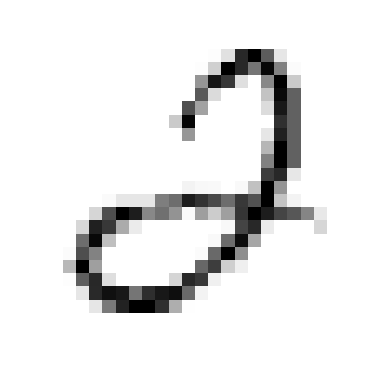

In [10]:
# Showing the chose number in picture.
ronjas_number = X[1124] # Saving the chosen number in a variable.
ronjas_number_img = ronjas_number.reshape(28, 28)

plt.imshow(ronjas_number_img, cmap='binary') # Converting to an image.
plt.axis('off') # This decides if there will be axis, comment out to see the difference.
plt.show()

In [11]:
# Checking the label of the instance.
print(y[1124])

2


In [12]:
type(y[1124]) # Checking the data type of the instance, it is an integer.

numpy.uint8

Jag valde att göra mindre EDA eftersom våra hjärnor är väldigt bra på att känna igen mönster. Jag vill inte titta in i datan för mycket så att jag redan har hunnit få en uppfattning som kan påverka mina beslut vid modellering senare. 

## 3. Skapar tränings- och valideringsdata

In [13]:
# Taking out a smaller part of the data for training to save run time.
X_train = X[:6000]
y_train = y[:6000]
X_val = X[6000:7000]
y_val = y[6000:7000] 

In [14]:
# Scaling the data with StandardScaler (for SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val) # We only trnsform the validation data, not fitting.

In [15]:
# Checkingf the shape of the smaller training data.
print(X_train_scaled.shape)
print(y_train.shape)

# Checking the shape of the validation data.
print(X_val_scaled.shape)
print(y_val.shape)

(6000, 784)
(6000,)
(1000, 784)
(1000,)


## 4.1 Modellering: SVM, SGD och KNN (basmodeller för senare modellering) 

In [16]:
# A function to visualize Confusion Matrix (lånad av Antonio från hans föreläsning :D)
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

Best parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best score:  0.9178333333333333
----------
Accuracy score:  0.93
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        99
           1       0.98      0.98      0.98       113
           2       0.96      0.85      0.90        94
           3       0.99      0.86      0.92       108
           4       0.91      0.99      0.95        93
           5       0.97      0.95      0.96        96
           6       0.95      0.99      0.97       101
           7       0.96      0.78      0.86       103
           8       0.84      0.95      0.89        99
           9       0.80      0.96      0.87        94

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.94      0.93      0.93      1000



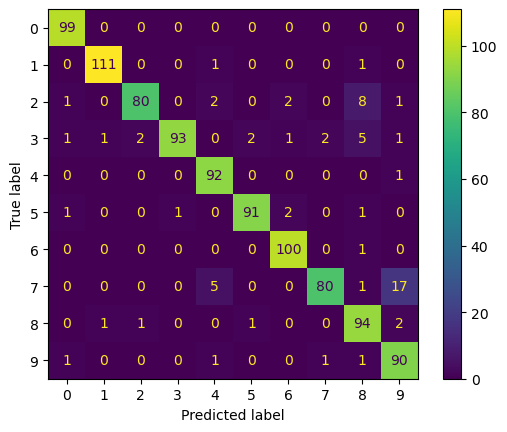

In [17]:
# Model 1: SVM
svc = SVC(probability = True)

# GridSearch
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc_gs = GridSearchCV(svc, param_grid, cv=2)

svc_gs.fit(X_train_scaled, y_train)

print("Best parameters: ", svc_gs.best_params_)
print("Best score: ", svc_gs.best_score_)
print('----------')

# Prediction
y_pred_svc = svc_gs.predict(X_val_scaled)

print('Accuracy score: ', accuracy_score(y_val, y_pred_svc, normalize = True))
print(classification_report(y_val, y_pred_svc))

display_confusion_matrix(y_val, y_pred_svc)

/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Best parameters:  {'alpha': 0.001, 'max_iter': 2000, 'tol': 0.0001}
Best score:  0.8886666666666667
----------
Accuracy score:  0.911
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        99
           1       0.95      0.96      0.96       113
           2       0.95      0.88      0.92        94
           3       0.95      0.81      0.87       108
           4       0.94      0.91      0.93        93
           5       0.83      0.90      0.86        96
           6       0.94      0.94      0.94       101
           7       0.97      0.86      0.91       103
           8       0.82      0.89      0.85        99
           9       0.83      0.96      0.89        94

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



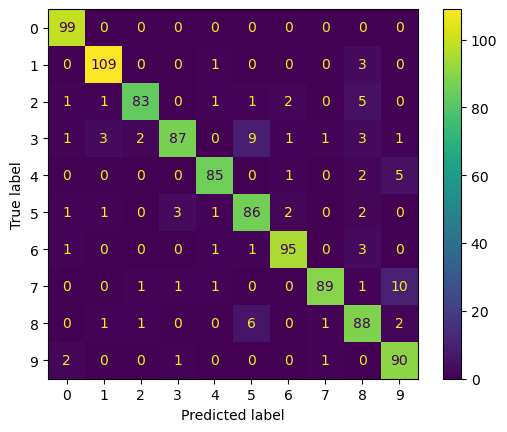

In [18]:
# Model 2: SGDClassifier
sgd = SGDClassifier(loss = 'log', random_state = 42)

# GridSearch
param_grid = {
    'max_iter': [1000, 2000],
    'tol': [1e-3, 1e-4],
    'alpha': [0.001, 0.01]
}

sgd_gs = GridSearchCV(sgd, param_grid, cv=2)

sgd_gs.fit(X_train_scaled, y_train)

print("Best parameters: ", sgd_gs.best_params_)
print("Best score: ", sgd_gs.best_score_)
print('----------')

# Prediction
y_pred_sgd = sgd_gs.predict(X_val_scaled)

print('Accuracy score: ', accuracy_score(y_val, y_pred_sgd, normalize = True))
print(classification_report(y_val, y_pred_sgd))

display_confusion_matrix(y_val, y_pred_sgd)

/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

Best parameters:  {'n_neighbors': 7, 'weights': 'distance'}
Best score:  0.8836666666666666
----------
Accuracy score:  0.895
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        99
           1       0.88      0.99      0.93       113
           2       0.97      0.83      0.90        94
           3       0.92      0.82      0.87       108
           4       0.91      0.90      0.91        93
           5       0.90      0.86      0.88        96
           6       0.90      0.97      0.93       101
           7       0.96      0.75      0.84       103
           8       0.92      0.86      0.89        99
           9       0.73      0.96      0.83        94

    accuracy                           0.90      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.90      0.90      0.89      1000



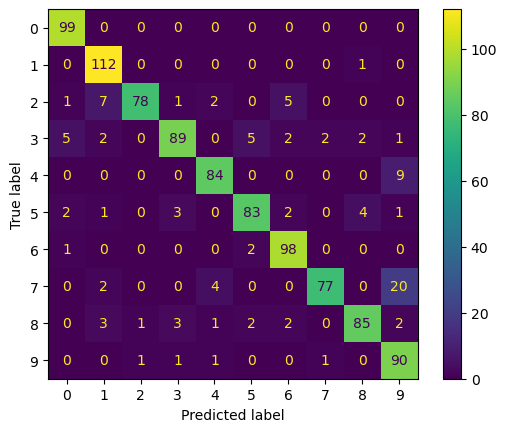

In [19]:
# Model 3: KNN (The fastest to run)
knn = KNeighborsClassifier()

# GridSearch
param_grid = {
    'n_neighbors': [3, 5, 7, 9], 
    'weights': ['uniform', 'distance']
}

knn_gs = GridSearchCV(knn, param_grid, cv=2)

knn_gs.fit(X_train_scaled, y_train)

print("Best parameters: ", knn_gs.best_params_)
print("Best score: ", knn_gs.best_score_)
print('----------')

# Prediction
y_pred_knn = knn_gs.predict(X_val_scaled)

print('Accuracy score: ', accuracy_score(y_val, y_pred_knn, normalize = True))
print(classification_report(y_val, y_pred_knn))

display_confusion_matrix(y_val, y_pred_knn)

In [20]:
# A summary of above 3 base models' accuracy scores.
for model, name in zip([svc_gs, sgd_gs, knn_gs], ["SVM", "SGD", "KNN"]):
    y_pred = model.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average = 'weighted')
    print(f"{name} accuracy: {accuracy:.2f}")
    print(f"{name} F1: {f1:.2f}")
    print("----------")

SVM accuracy: 0.93
SVM F1: 0.93
----------
SGD accuracy: 0.91
SGD F1: 0.91
----------
KNN accuracy: 0.90
KNN F1: 0.89
----------


## 4.2 Modellering: VOT och RND

/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of

Accuracy score:  0.926
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        99
           1       0.97      0.98      0.97       113
           2       0.96      0.90      0.93        94
           3       0.98      0.83      0.90       108
           4       0.95      0.94      0.94        93
           5       0.90      0.94      0.92        96
           6       0.93      0.98      0.96       101
           7       0.96      0.83      0.89       103
           8       0.89      0.90      0.89        99
           9       0.82      0.96      0.88        94

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



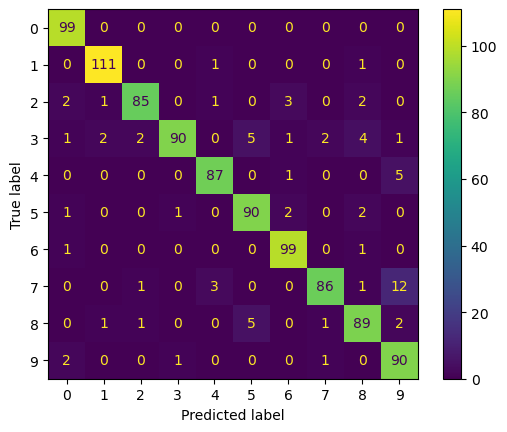

In [21]:
# Model 1: VotingClassifier (with the 3 base models in session 4.1)
vot = VotingClassifier(
    estimators=[('svc', svc_gs), ('sg', sgd_gs), ('kn', knn_gs)],
    voting='soft')
vot.fit(X_train_scaled, y_train)
y_pred_vot = vot.predict(X_val_scaled)

print('Accuracy score: ', accuracy_score(y_val, y_pred_vot, normalize = True))
print(classification_report(y_val, y_pred_vot))

display_confusion_matrix(y_val, y_pred_vot)

Accuracy score:  0.947
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        99
           1       0.98      0.98      0.98       113
           2       0.95      0.97      0.96        94
           3       0.97      0.89      0.93       108
           4       0.96      0.95      0.95        93
           5       0.95      0.98      0.96        96
           6       0.96      0.98      0.97       101
           7       0.96      0.89      0.92       103
           8       0.93      0.89      0.91        99
           9       0.85      0.95      0.89        94

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



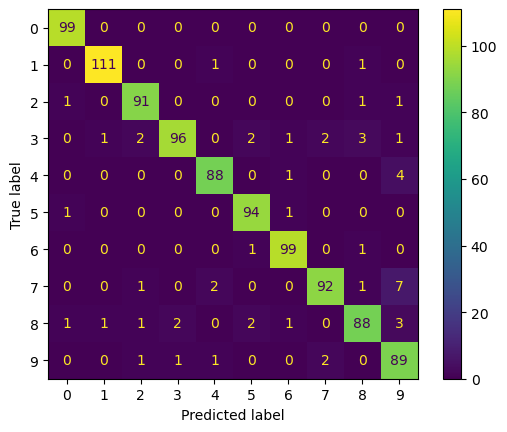

In [22]:
# Model 2: RandomForestClassifier (without GridSearch)
rnd_f = RandomForestClassifier(n_estimators = 600, random_state=42)
rnd_f.fit(X_train_scaled, y_train)
y_pred_rnd = rnd_f.predict(X_val_scaled)

print('Accuracy score: ', accuracy_score(y_val, y_pred_rnd, normalize = True))
print(classification_report(y_val, y_pred_rnd))

display_confusion_matrix(y_val, y_pred_rnd)

Best parameters:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.9271666666666667
----------
Accuracy score:  0.948
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        99
           1       0.98      0.98      0.98       113
           2       0.93      0.97      0.95        94
           3       0.97      0.90      0.93       108
           4       0.94      0.94      0.94        93
           5       0.96      0.97      0.96        96
           6       0.96      0.97      0.97       101
           7       0.97      0.89      0.93       103
           8       0.95      0.92      0.93        99
           9       0.86      0.95      0.90        94

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



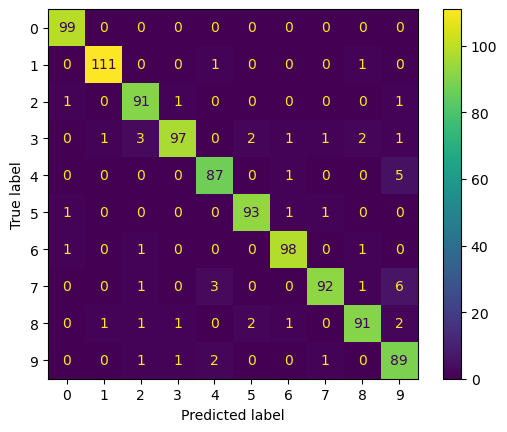

In [23]:
# Model 3: RandomForestClassifier (with GridSearch)
rnd = RandomForestClassifier(random_state=42)

# GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rnd_gs = GridSearchCV(rnd, param_grid, cv=2)

rnd_gs.fit(X_train_scaled, y_train)

print("Best parameters: ", rnd_gs.best_params_)
print("Best score: ", rnd_gs.best_score_)
print('----------')

y_pred_rnd = rnd_gs.predict(X_val_scaled)

print('Accuracy score: ', accuracy_score(y_val, y_pred_rnd, normalize = True))
print(classification_report(y_val, y_pred_rnd))

display_confusion_matrix(y_val, y_pred_rnd)

rnd_best = rnd_gs.best_estimator_

In [24]:
# A summary of above 3 essemble models' accuracy scores.
for model, name in zip([vot, rnd_f, rnd_best], ['VOT', 'RF', 'RF (GridSearch)']):
    y_pred = model.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average = 'weighted')
    print(f"{name} accuracy: {accuracy:.2f}")
    print(f"{name} F1: {f1:.2f}")
    print("----------")

VOT accuracy: 0.93
VOT F1: 0.93
----------
RF accuracy: 0.95
RF F1: 0.95
----------
RF (GridSearch) accuracy: 0.95
RF (GridSearch) F1: 0.95
----------


## 5. Testa VOT och RND på testdata

In [25]:
# Taking a new test set (observation 7001 to 8000)
X_test = X[7000:8000]
y_test = y[7000:8000]

# Standardiserar datasetet med StandardScaler 
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

print(X_test_scaled.shape)
print(y_test.shape)

# Checking the first number in this test set.
y_test[0]

(1000, 784)
(1000,)


8

In [31]:
for model, name in zip([vot, rnd_f, rnd_best], ['VOT', 'RF', 'RF (GridSearch)']):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    print(f"{name} accuracy: {accuracy:.2f}")
    print(f"{name} F1: {f1:.2f}")
    print("----------")

VOT accuracy: 0.93
VOT F1: 0.93
----------
RF accuracy: 0.78
RF F1: 0.75
----------
RF (GridSearch) accuracy: 0.80
RF (GridSearch) F1: 0.79
----------


Accuracy scores på validation data och test data är ganska exakt, så modellen VotingClassifier är den bästa (untan overfitting eller underfitting). Jag väljer därför **VotingClassifier** som min modell för att prediktera handskrivna siffror.

## 6. Testa VOT på en större test data (test_2)

In [28]:
# Taking a new test set (observation 8001 to 18000)
X_test_2 = X[8000:18000]
y_test_2 = y[8000:18000]

# Standardiserar datasetet med StandardScaler 
scaler = StandardScaler()
X_test_2_scaled = scaler.fit_transform(X_test_2)

print(X_test_2_scaled.shape)
print(y_test_2.shape)

# Checking a chosen number in this test set.
y_test_2[1124]

(10000, 784)
(10000,)


5

VOT accuracy:  0.9234
VOT F1:  0.9233203939901891
----------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       988
           1       0.96      0.98      0.97      1145
           2       0.91      0.92      0.92       952
           3       0.93      0.89      0.91      1072
           4       0.92      0.93      0.92       948
           5       0.93      0.91      0.92       885
           6       0.94      0.95      0.95       973
           7       0.95      0.91      0.93      1047
           8       0.90      0.86      0.88       979
           9       0.85      0.91      0.88      1011

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



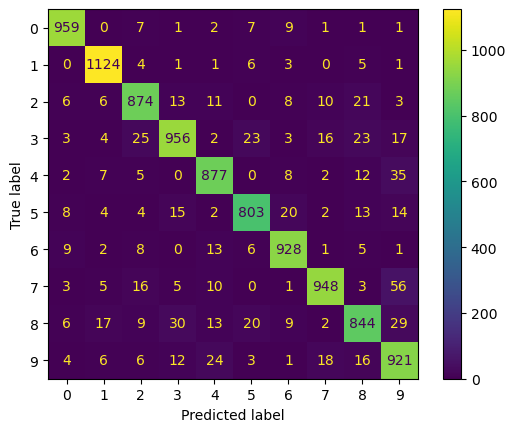

In [34]:
# Chosen model: Voting
y_test_2_pred = vot.predict(X_test_2_scaled)

print('VOT accuracy: ', accuracy_score(y_test_2, y_test_2_pred, normalize = True))
print('VOT F1: ', f1_score(y_test_2, y_test_2_pred, average = 'weighted'))
print('----------')
print(classification_report(y_test_2, y_test_2_pred))

display_confusion_matrix(y_test_2, y_test_2_pred)

VOT presterar lika bra när jag ökade antralet observationer till 10000 (test_2) istället för 1000 (val och test).

**Slutsats**: efter testat VOT-modellen 2 gånger så ser vi att accuracy scores på alla 3 prediktioner (val, test, test_2) är ungefär på samma range. Jag tycker att modellen presterar tillräckligt bra i nuläget där jag inte har en specifik user case.

**Förslag på vidareutveckling**: beroende vad man ska använda modellen till så kan man behöva förbättra modellen ytterligare. Med hjälp av Confusion Matrix kan man också se att modellen prediketar sämre på vissa siffror (7 och 9), så man skulle kunna vidareutveckla modellen så att den kan predikera lika bra på alla siffror. Man kan också använda neurala nätverk för att utveckla en ny modell som kan eventuellt öka prediktionsförmåga ytterligare.